<a href="https://colab.research.google.com/github/rezar12/MASTERMODEL/blob/main/FinalMemoireLASTEDVariantclade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MATRICE DATA CLADE

In [1]:
! pip install scikit-learn scikeras tensorflow pandas mlflow numpy plotly matplotlib imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

### data before ML prepocessing data clade

In [3]:
#! unzip '/content/MATRICESNPSCLADE.zip'

In [4]:
dataclade = pd.read_csv('/content/Matriceclade.tsv',sep="\t",low_memory=False)

In [5]:
# remplacons les indices par le unnamed EPI_ISL
dataclade.index=dataclade['Unnamed: 0']

In [6]:
dataclade = dataclade.iloc[:,1:]

In [7]:
dataclade.index.names = ['Sequence']

In [8]:
dataclade

,SNP0,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,...,SNP9539,SNP9540,SNP9541,SNP9542,SNP9543,SNP9544,SNP9545,SNP9546,SNP9547,clade
Sequence,,,,,,,,,,,,,,,,,,,,,
EPI_ISL_14799150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_15125282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_15125283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_15125284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)


### data preposcessing

In [9]:
featurename = dataclade.columns

In [10]:
featurename

Index(['SNP0', 'SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5', 'SNP6', 'SNP7', 'SNP8',
       'SNP9',
       ...
       'SNP9539', 'SNP9540', 'SNP9541', 'SNP9542', 'SNP9543', 'SNP9544',
       'SNP9545', 'SNP9546', 'SNP9547', 'clade'],
      dtype='object', length=9549)

In [11]:
dataclade['clade'].value_counts()

22B (Omicron)    6980
22A (Omicron)     817
21L (Omicron)     403
recombinant       251
21K (Omicron)     209
22D (Omicron)      43
22C (Omicron)      11
21M (Omicron)      10
20A                 1
20B                 1
Name: clade, dtype: int64

In [12]:
viz = pd.DataFrame(data={'clade':list(dataclade['clade'].value_counts().index), 'Nombres de sequence':list(dataclade['clade'].value_counts().values)})

In [13]:
from plotly import express as px

fig = px.bar(data_frame=viz,x='clade',y='Nombres de sequence',text_auto='',
            title="NOMBRES DE SEQUENCES PAR CLADE")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### SMOTE

In [14]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [15]:
data=dataclade.values

In [16]:
X,y=data[:,:-1],data[:,-1]

In [17]:
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y)

In [18]:
np.unique(encoded_Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

classe: 6, nombres: 6980, ratio : 79.9908319963328
classe: 5, nombres: 817, ratio : 9.362823745129498
classe: 9, nombres: 251, ratio : 2.87646115058446
classe: 3, nombres: 403, ratio : 4.618381847352739
classe: 7, nombres: 11, ratio : 0.12606005042402016
classe: 2, nombres: 209, ratio : 2.395140958056383
classe: 4, nombres: 10, ratio : 0.11460004584001833
classe: 8, nombres: 43, ratio : 0.4927801971120789
classe: 0, nombres: 1, ratio : 0.011460004584001834
classe: 1, nombres: 1, ratio : 0.011460004584001834


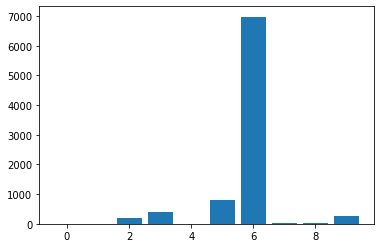

In [19]:
counter = Counter(encoded_Y)
for k,v in counter.items():
  per = v / len(encoded_Y) * 100
  print(f'classe: {k}, nombres: {v}, ratio : {per}')
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
oversample = RandomOverSampler(random_state=42)

In [22]:
X_smote,y_smote = oversample.fit_resample(X,encoded_Y)

classe: 6, nombres: 6980, ratio : 79.9908319963328
classe: 5, nombres: 6980, ratio : 79.9908319963328
classe: 9, nombres: 6980, ratio : 79.9908319963328
classe: 3, nombres: 6980, ratio : 79.9908319963328
classe: 7, nombres: 6980, ratio : 79.9908319963328
classe: 2, nombres: 6980, ratio : 79.9908319963328
classe: 4, nombres: 6980, ratio : 79.9908319963328
classe: 8, nombres: 6980, ratio : 79.9908319963328
classe: 0, nombres: 6980, ratio : 79.9908319963328
classe: 1, nombres: 6980, ratio : 79.9908319963328


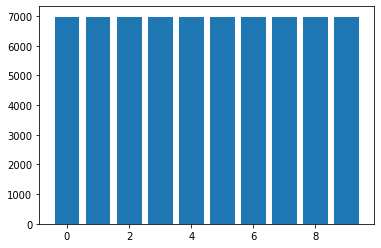

In [23]:
counter = Counter(y_smote)
for k,v in counter.items():
  per = v / len(encoded_Y) * 100
  print(f'classe: {k}, nombres: {v}, ratio : {per}')
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [24]:
X = X_smote
Y = y_smote
# convert integers to dummy variables (i.e. one hot encoded)


In [25]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Feature Reduction

In [26]:
from sklearn.model_selection import train_test_split
train_ratio = 0.70
test_ratio = 0.15
val_ratio = 0.15



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=1-train_ratio)
X_val,X_test,Y_val,Y_test = train_test_split(X,Y,random_state=42,test_size=test_ratio/(val_ratio+test_ratio))

In [27]:
Counter(encoder.inverse_transform(Y_train))

Counter({'22C (Omicron)': 4945,
         '20B': 4899,
         '21L (Omicron)': 4869,
         '21M (Omicron)': 4831,
         '22A (Omicron)': 4894,
         '22B (Omicron)': 4934,
         '20A': 4884,
         '22D (Omicron)': 4839,
         'recombinant': 4844,
         '21K (Omicron)': 4920})

In [28]:
Counter(encoder.inverse_transform(Y_test))

Counter({'22C (Omicron)': 3416,
         '20B': 3431,
         '22A (Omicron)': 3449,
         '21K (Omicron)': 3472,
         '22B (Omicron)': 3499,
         '20A': 3486,
         '21L (Omicron)': 3591,
         'recombinant': 3494,
         '22D (Omicron)': 3512,
         '21M (Omicron)': 3550})

In [29]:
Counter(encoder.inverse_transform(Y_val))

Counter({'22B (Omicron)': 3481,
         '21L (Omicron)': 3389,
         '22D (Omicron)': 3468,
         '21K (Omicron)': 3508,
         '22C (Omicron)': 3564,
         '20A': 3494,
         '20B': 3549,
         '22A (Omicron)': 3531,
         'recombinant': 3486,
         '21M (Omicron)': 3430})

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Convient uniquement à l'ensemble d'entraînement. 
scaler.fit(X_train)
# Appliquez la transformation à la fois à l'ensemble d'apprentissage et à l'ensemble de test. 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [31]:
X_train

array([[-0.0045241 , -0.0045241 ,  0.        , ..., -0.02307438,
         0.        , -0.00904848],
       [-0.0045241 , -0.0045241 ,  0.        , ..., -0.02307438,
         0.        , -0.00904848],
       [-0.0045241 , -0.0045241 ,  0.        , ..., -0.02307438,
         0.        , -0.00904848],
       ...,
       [-0.0045241 , -0.0045241 ,  0.        , ..., -0.02307438,
         0.        , -0.00904848],
       [-0.0045241 , -0.0045241 ,  0.        , ..., -0.02307438,
         0.        , -0.00904848],
       [-0.0045241 , -0.0045241 ,  0.        , ..., -0.02307438,
         0.        , -0.00904848]])

# Mise en place de l'ACP avec une conservation de la variance a 95%

In [32]:
from sklearn.decomposition import PCA
# création d'une instance de l'acp
acp = PCA(.95)

In [33]:
acp.fit(X_train)

PCA(n_components=0.95)

In [34]:
from pickle import dump

In [35]:
# save scaler
#dump(scaler, open('scaler.pkl', 'wb'))
# save acp
#dump(acp, open('acp.pkl', 'wb'))

In [36]:
X_train = acp.transform(X_train)
X_test = acp.transform(X_test)

In [37]:
X_train.shape

(48859, 3582)

# GRID SEARCH

In [48]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from scikeras.wrappers import KerasClassifier

# creation du classifier reseau de neurone
def create_model(neurone,dropout):
	# creation du modele
	model = Sequential()
	model.add(Dense(neurone, input_shape=(X_train.shape[1],), activation='relu'))
	model.add(Dropout(dropout))
	model.add(Dense(10, activation='softmax'))
	return model



model = KerasClassifier(model=create_model, loss="categorical_crossentropy",verbose=1,metrics=['accuracy'],dropout=0.2,neurone=200)
# definir les parametres du grid search
neurone = [200,400,800]
dropout = [0.2,0.3]
batch_size= [16,32]
epochs=[30,40]
optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer,neurone=neurone,dropout=dropout)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)

In [49]:
grid_result = grid.fit(X_train,Y_train)
# resumer du model
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 1/30
764/764 [==============================] - 3s 3ms/step - loss: 0.2195 - accuracy: 0.9609
Epoch 2/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0276 - accuracy: 0.9960
Epoch 3/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0201 - accuracy: 0.9970
Epoch 4/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0153 - accuracy: 0.9979
Epoch 5/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0090 - accuracy: 0.9984
Epoch 6/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0184 - accuracy: 0.9984
Epoch 7/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0196 - accuracy: 0.9984
Epoch 8/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0619 - accuracy: 0.9966
Epoch 9/30
764/764 [==============================] - 3s 3ms/step - loss: 0.0328 - accuracy: 0.9973
Epoch 10/30
764/764 [=

In [50]:
# meilleur score de classication est :

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.998178 using {'batch_size': 16, 'dropout': 0.2, 'epochs': 30, 'neurone': 800, 'optimizer': 'SGD'}


# BEST MODEL

In [56]:
import tensorflow
classifier = Sequential()
classifier.add(Dense(800, input_shape=(X_train.shape[1],), activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10, activation='softmax'))
classifier.compile(loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(), optimizer='SGD',metrics=["accuracy"])
# APPLIQUATION DU MODELE AU DONNÉES D'ENTRAINEMENT
history=classifier.fit(X_train,Y_train, epochs=30,batch_size=16,validation_data=(X_test, Y_test))

Epoch 1/30
3054/3054 [==============================] - 28s 9ms/step - loss: 0.1091 - accuracy: 0.9769 - val_loss: 0.0170 - val_accuracy: 0.9962
Epoch 2/30
3054/3054 [==============================] - 26s 8ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.0118 - val_accuracy: 0.9969
Epoch 3/30
3054/3054 [==============================] - 26s 8ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0092 - val_accuracy: 0.9978
Epoch 4/30
3054/3054 [==============================] - 26s 8ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0082 - val_accuracy: 0.9978
Epoch 5/30
3054/3054 [==============================] - 26s 8ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0074 - val_accuracy: 0.9979
Epoch 6/30
3054/3054 [==============================] - 26s 8ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0066 - val_accuracy: 0.9982
Epoch 7/30
3054/3054 [==============================] - 27s 9ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0057 - val_ac

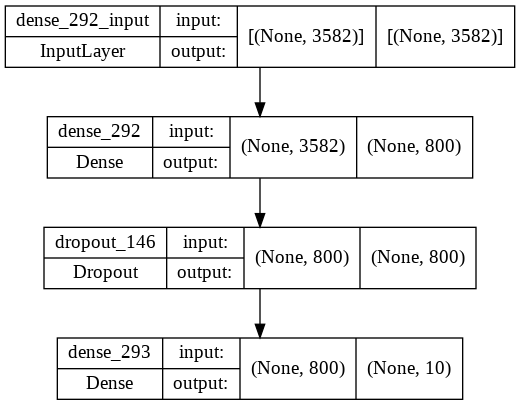

In [57]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
classifier.evaluate(X_test, Y_test)

1091/1091 [==============================] - 5s 4ms/step - loss: 0.0029 - accuracy: 0.9996


[0.0028689629398286343, 0.9995988607406616]

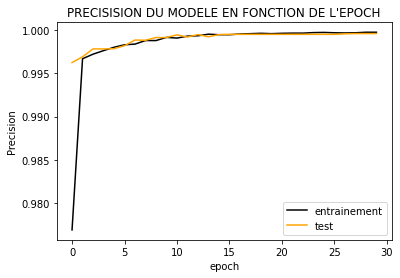

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color="black")
plt.plot(history.history['val_accuracy'],color="orange")
plt.title("PRECISISION DU MODELE EN FONCTION DE L'EPOCH")
plt.ylabel("Precision")
plt.xlabel("epoch")
plt.legend(['entrainement','test'],loc='lower right')
plt.show()

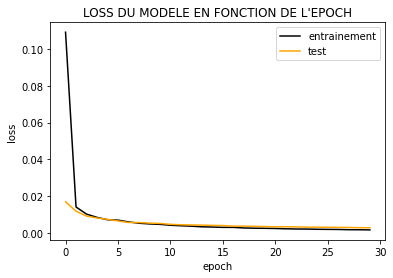

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color="black")
plt.plot(history.history['val_loss'],color="orange")
plt.title("LOSS DU MODELE EN FONCTION DE L'EPOCH")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['entrainement','test'],loc='upper right')
plt.show()

In [74]:
# save model
dump(classifier, open('model.pkl', 'wb'))

In [61]:
pred=classifier.predict(X_test)
Y_labelencodePred=np.argmax(pred, axis=1)

In [62]:
encoder.inverse_transform(Y_labelencodePred)

array(['22C (Omicron)', '20B', '22A (Omicron)', ..., '21M (Omicron)',
       'recombinant', '22A (Omicron)'], dtype=object)

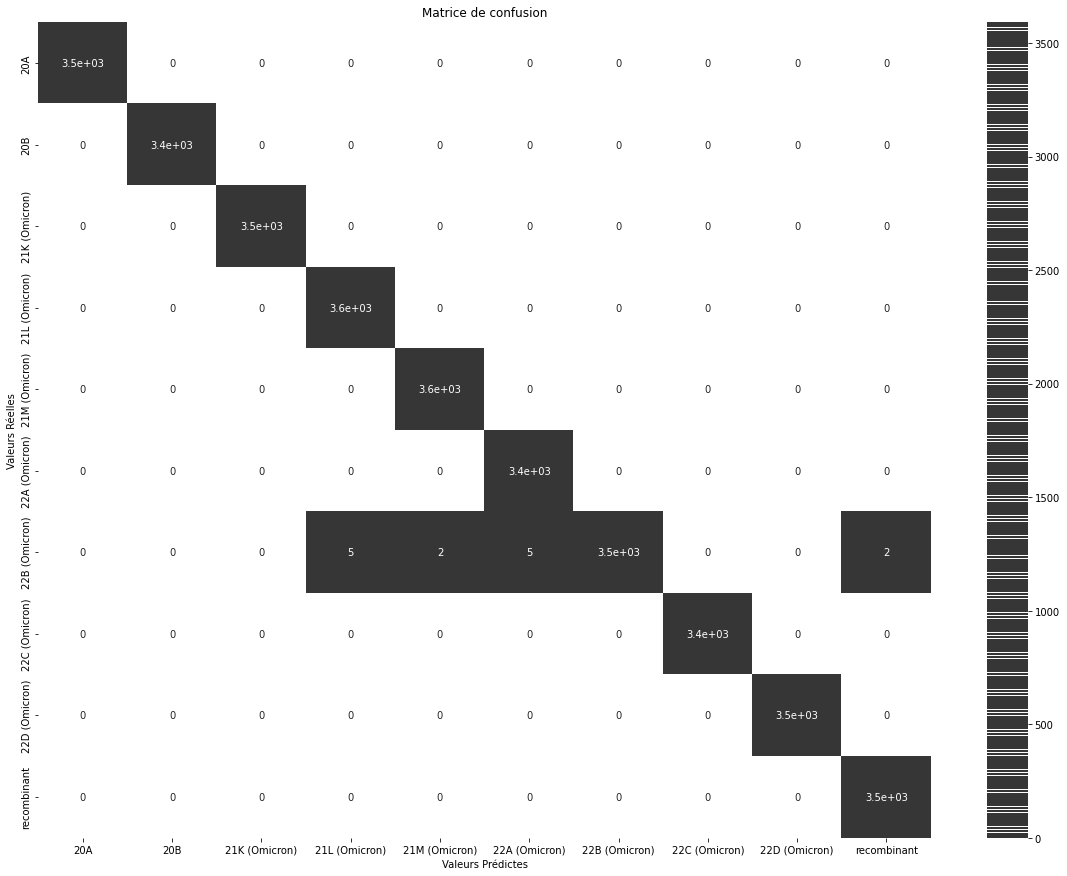

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
CM = confusion_matrix(encoder.inverse_transform(Y_test), encoder.inverse_transform(Y_labelencodePred))
mypalette = ['#ffff','#363636','#363636','#363636','#363636','#363636','#363636']
sns.heatmap(CM, annot=True,cmap=sns.color_palette(mypalette, 2000),)
ax.set_xlabel('Valeurs Prédictes');ax.set_ylabel('Valeurs Réelles'); 
ax.set_title('Matrice de confusion'); 
ax.xaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_test)))); ax.yaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_labelencodePred))));

In [64]:
from sklearn.metrics import classification_report
report = classification_report(encoder.inverse_transform(Y_test), encoder.inverse_transform(Y_labelencodePred),labels=sorted(np.unique(encoder.inverse_transform(Y_test))),output_dict=True)

In [66]:
pd.DataFrame(data=report)

,20A,20B,21K (Omicron),21L (Omicron),21M (Omicron),22A (Omicron),22B (Omicron),22C (Omicron),22D (Omicron),recombinant,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,0.998610,0.999437,0.998552,1.000000,1.0,1.0,0.999428,0.999599,0.999603,0.999599
recall,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.995999,1.0,1.0,1.000000,0.999599,0.999600,0.999599
f1-score,1.0,1.0,1.0,0.999304,0.999718,0.999276,0.997995,1.0,1.0,0.999714,0.999599,0.999601,0.999599
support,3486.0,3431.0,3472.0,3591.000000,3550.000000,3449.000000,3499.000000,3416.0,3512.0,3494.000000,0.999599,34900.000000,34900.000000


In [67]:
dataplot = pd.DataFrame(data=report)
dataplot=dataplot.iloc[:,:-3]

In [68]:
dataplot=dataplot.T
dataplot=dataplot*100

In [69]:
dataplot

,precision,recall,f1-score,support
20A,100.000000,100.000000,100.000000,348600.0
20B,100.000000,100.000000,100.000000,343100.0
21K (Omicron),100.000000,100.000000,100.000000,347200.0
21L (Omicron),99.860957,100.000000,99.930430,359100.0
21M (Omicron),99.943694,100.000000,99.971839,355000.0
22A (Omicron),99.855240,100.000000,99.927568,344900.0
22B (Omicron),100.000000,99.599886,99.799542,349900.0
22C (Omicron),100.000000,100.000000,100.000000,341600.0
22D (Omicron),100.000000,100.000000,100.000000,351200.0
recombinant,99.942792,100.000000,99.971388,349400.0


## Nouvelle Prediction

In [70]:
from pickle import load
scalerimport = load(open('scaler.pkl', 'rb'))
acpimport = load(open('acp.pkl', 'rb'))

In [75]:
# import model
modelimport = load(open('model.pkl', 'rb'))

In [71]:
valpredict = scalerimport.transform(X_val)
valpredictacp = acpimport.transform(valpredict)

In [73]:
valpredictacp.shape

(34900, 3582)

In [76]:
ypredval = modelimport.predict(valpredictacp)

In [77]:
Y_labelencodePredval=np.argmax(ypredval, axis=1)

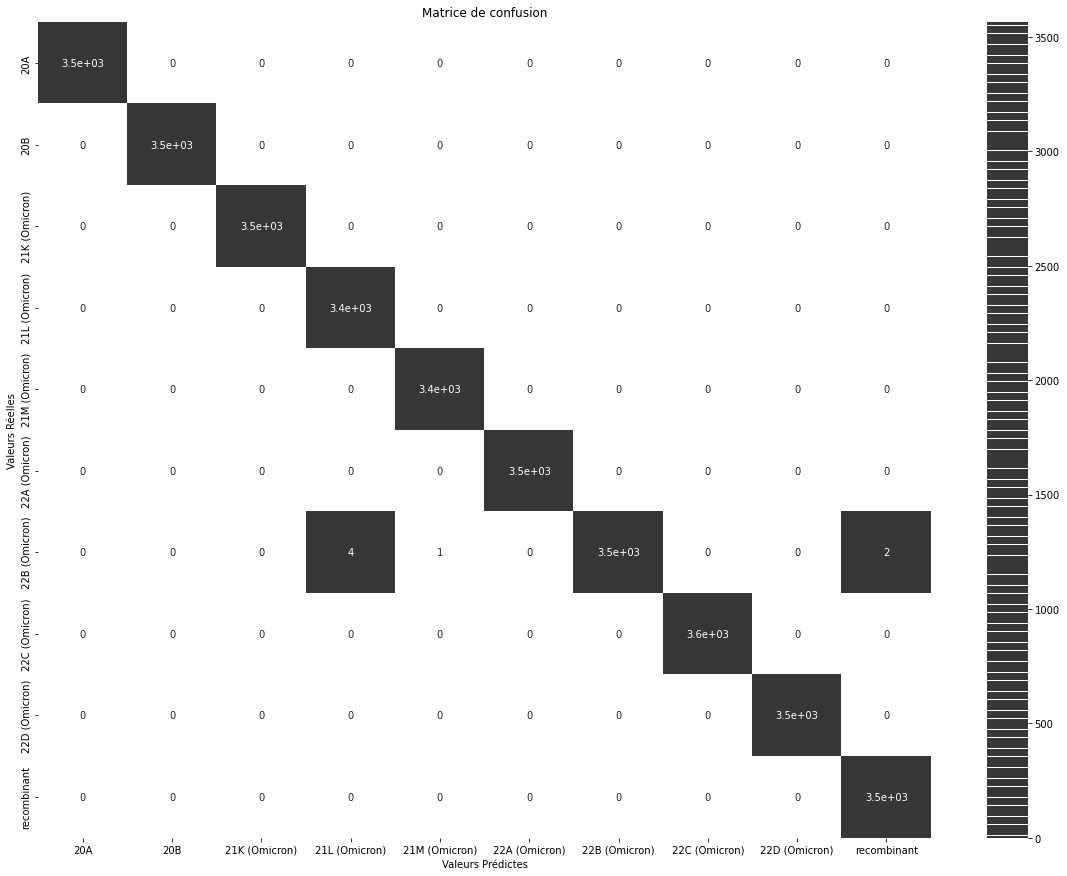

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
CM = confusion_matrix(encoder.inverse_transform(Y_val), encoder.inverse_transform(Y_labelencodePredval))
mypalette = ['#ffff','#363636','#363636','#363636','#363636','#363636','#363636','#363636','#363636','#363636']
sns.heatmap(CM, annot=True,cmap=sns.color_palette(mypalette, 3000),)
ax.set_xlabel('Valeurs Prédictes');ax.set_ylabel('Valeurs Réelles'); 
ax.set_title('Matrice de confusion'); 
ax.xaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_val)))); ax.yaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_labelencodePredval))));